## Set up Environment

In [2]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np

import joblib

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Specific settings to enhance visualization in Jupyter notebooks
pd.set_option('display.max_rows', 50)  # Limit the maximum number of visible rows to improve performance.
pd.set_option('display.max_columns', None)  # Show all available columns

# System settings and handling of custom modules
import sys
sys.path.append('..')

# Import custom modules for specific functionalities
from utils.utils import (
    plot_and_get_top_features,
    evaluate_and_plot_model,
    plot_auc_roc
)

## Load Data

In [4]:
X_train = joblib.load('../../data/X_train.pkl')
X_test = joblib.load('../../data/X_test.pkl')
y_train = joblib.load('../../data/y_train.pkl')
y_test = joblib.load('../../data/y_test.pkl')

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (136, 68) y_train: (136,)
X_test: (34, 68) y_test: (34,)


## Gradient Boosting Classifier

In [6]:
# Mesh search configuration for GradientBoostingClassifier
param_grid_gbc = {
    #'n_estimators': [100, 200, 300],
    'n_estimators': [100, 200],
    'max_depth': range(3, 10),
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the GradientBoostingClassifier model.
gbc = GradientBoostingClassifier(random_state=42)
grid_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc, cv=10, scoring='balanced_accuracy', verbose=2)
grid_gbc.fit(X_train, y_train)

print("Best mean cross-validation score: {:.3f}".format(grid_gbc.best_score_))
print("Best parameters: {}".format(grid_gbc.best_params_))

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_

In [7]:
# Adjust the optimal model
best_gbc = GradientBoostingClassifier(random_state=42, max_depth=grid_gbc.best_params_['max_depth'],
                                      learning_rate=grid_gbc.best_params_['learning_rate'],
                                      n_estimators=grid_gbc.best_params_['n_estimators'])
gbc = best_gbc.fit(X_train, y_train)

# Model evaluation
print("Train accuracy: {:.3f}".format(best_gbc.score(X_train, y_train)))
print("Test accuracy: {:.3f}".format(best_gbc.score(X_test, y_test)))

Train accuracy: 0.956
Test accuracy: 0.676


Resultados para GradientBoostingClassifier:
Accuracy: 0.6765
Precision: 0.6932
Recall: 0.6765
F1 Score: 0.6693


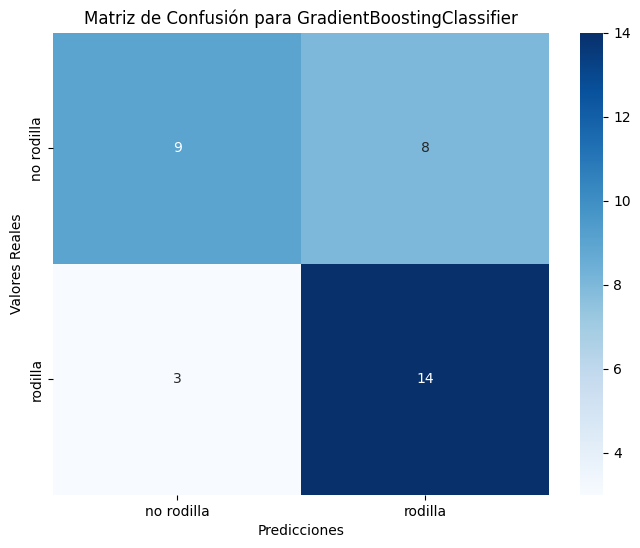

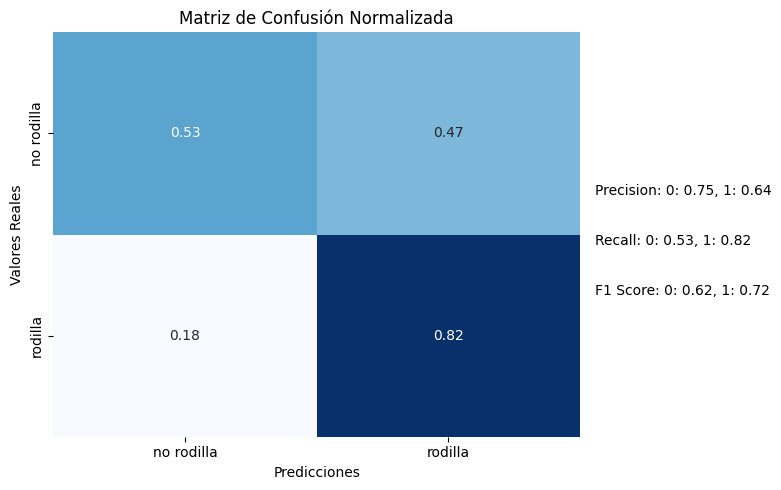


Classification Report:

              precision    recall  f1-score   support

  no rodilla       0.75      0.53      0.62        17
     rodilla       0.64      0.82      0.72        17

    accuracy                           0.68        34
   macro avg       0.69      0.68      0.67        34
weighted avg       0.69      0.68      0.67        34



In [8]:
class_names = ['no rodilla', 'rodilla']
evaluate_and_plot_model(gbc, X_test, y_test, class_names)

AUC-ROC: 0.7509


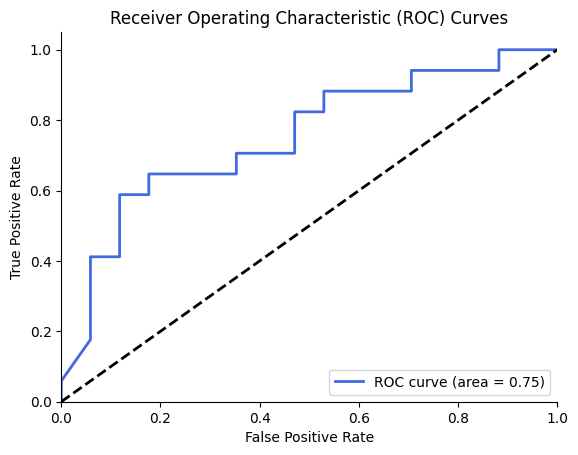

In [9]:
plot_auc_roc(gbc, X_test, y_test, class_names)

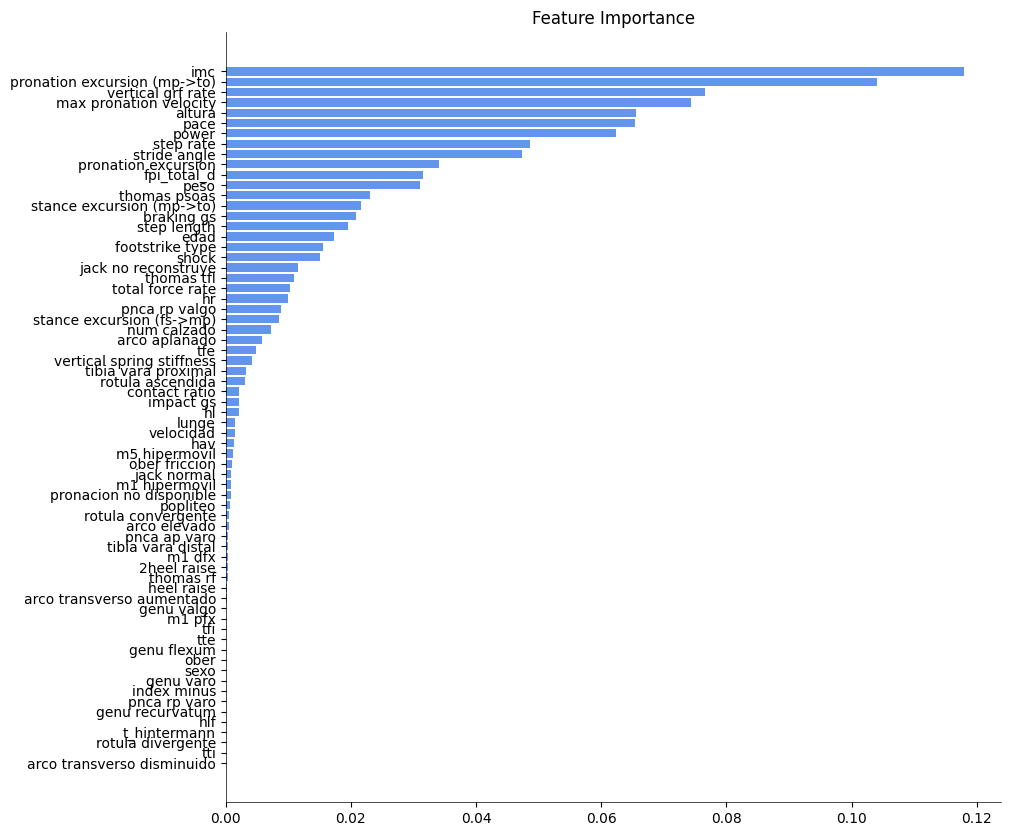

The top 45 most important features are:
['imc' 'pronation excursion (mp->to)' 'vertical grf rate'
 'max pronation velocity' 'altura' 'pace' 'power' 'step rate'
 'stride angle' 'pronation excursion' 'fpi_total_d' 'peso' 'thomas psoas'
 'stance excursion (mp->to)' 'braking gs' 'step length' 'edad'
 'footstrike type' 'shock' 'jack no reconstruye' 'thomas tfl'
 'total force rate' 'hr' 'pnca rp valgo' 'stance excursion (fs->mp)'
 'num calzado' 'arco aplanado' 'tfe' 'vertical spring stiffness'
 'tibia vara proximal' 'rotula ascendida' 'contact ratio' 'impact gs' 'hl'
 'lunge' 'velocidad' 'hav' 'm5 hipermovil' 'ober friccion' 'jack normal'
 'm1 hipermovil' 'pronacion no disponible' 'popliteo' 'rotula convergente'
 'arco elevado']


In [10]:
top_features = plot_and_get_top_features(gbc, X_train, top_n=45)

### Feature Selection

In [12]:
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

gbc = GradientBoostingClassifier(random_state=42)
grid_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc, cv=10, scoring='balanced_accuracy', verbose=2)
grid_gbc.fit(X_train_selected, y_train)

print("Best mean cross-validation score: {:.3f}".format(grid_gbc.best_score_))
print("Best parameters: {}".format(grid_gbc.best_params_))

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_

In [13]:
# Adjust the optimal model
best_gbc2 = GradientBoostingClassifier(random_state=42, max_depth=grid_gbc.best_params_['max_depth'],
                                      learning_rate=grid_gbc.best_params_['learning_rate'],
                                      n_estimators=grid_gbc.best_params_['n_estimators'])
gbc2 = best_gbc2.fit(X_train_selected, y_train)

# Model evaluation
print("Train accuracy: {:.3f}".format(best_gbc2.score(X_train_selected, y_train)))
print("Test accuracy: {:.3f}".format(best_gbc2.score(X_test_selected, y_test)))

Train accuracy: 0.963
Test accuracy: 0.647


Resultados para GradientBoostingClassifier:
Accuracy: 0.6471
Precision: 0.6680
Recall: 0.6471
F1 Score: 0.6357


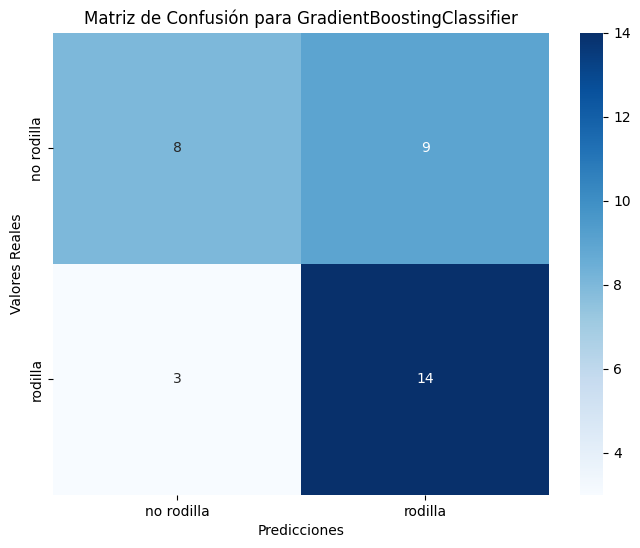

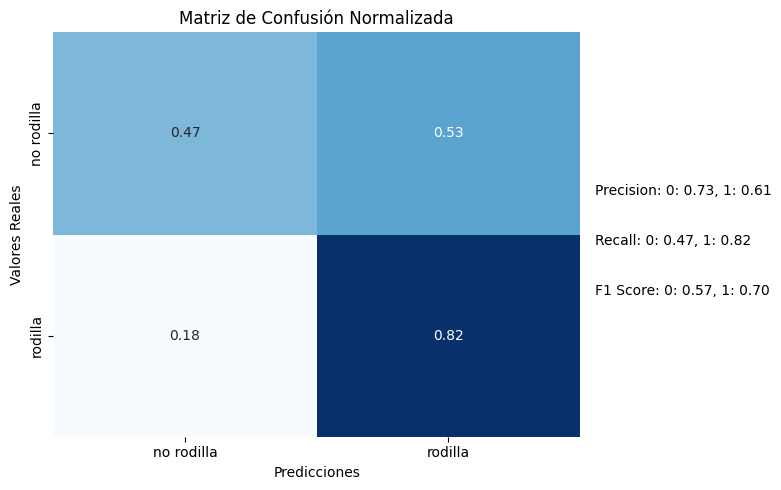


Classification Report:

              precision    recall  f1-score   support

  no rodilla       0.73      0.47      0.57        17
     rodilla       0.61      0.82      0.70        17

    accuracy                           0.65        34
   macro avg       0.67      0.65      0.64        34
weighted avg       0.67      0.65      0.64        34



In [14]:
evaluate_and_plot_model(gbc2, X_test_selected, y_test, class_names)

In [15]:
# Save the trained model
model_filename = '../../src/models/gbc_model.pkl'
joblib.dump(best_gbc2, model_filename)

print(f"Model saved as {model_filename}")

Model saved as ../../src/models/gbc_model.pkl


### With the feature selection of the best Random Forest model

In [17]:
features_randomforest = ['imc', 'total force rate', 'step rate', 'pronation excursion (mp->to)',
 'impact gs', 'contact ratio', 'max pronation velocity', 'power',
 'stance excursion (fs->mp)', 'vertical spring stiffness', 'braking gs',
 'peso', 'pronation excursion', 'footstrike type',
 'stance excursion (mp->to)', 'pace', 'step length', 'altura',
 'vertical grf rate', 'edad', 'stride angle', 'num calzado', 'shock',
 'tfe', 'fpi_total_d', 'thomas tfl', 'jack no reconstruye'] # he quitado velocidad, genu recurvatum y hl

X_train_selected = X_train[features_randomforest]
X_test_selected = X_test[features_randomforest]

# Create model GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
grid_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc, cv=10, scoring='balanced_accuracy', verbose=2)
grid_gbc.fit(X_train_selected, y_train)

print("Best mean cross-validation score: {:.3f}".format(grid_gbc.best_score_))
print("Best parameters: {}".format(grid_gbc.best_params_))

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_

In [18]:
# Adjust the optimal model
best_gbc3 = GradientBoostingClassifier(random_state=42, max_depth=grid_gbc.best_params_['max_depth'],
                                      learning_rate=grid_gbc.best_params_['learning_rate'],
                                      n_estimators=grid_gbc.best_params_['n_estimators'])
gbc3 = best_gbc3.fit(X_train_selected, y_train)

# Model evaluation
print("Train accuracy: {:.3f}".format(best_gbc3.score(X_train_selected, y_train)))
print("Test accuracy: {:.3f}".format(best_gbc3.score(X_test_selected, y_test)))

Train accuracy: 0.963
Test accuracy: 0.588


Resultados para GradientBoostingClassifier:
Accuracy: 0.5882
Precision: 0.6008
Recall: 0.5882
F1 Score: 0.5750


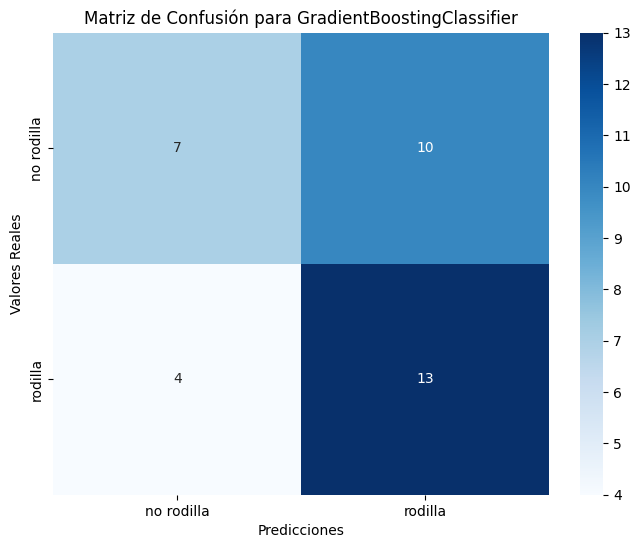

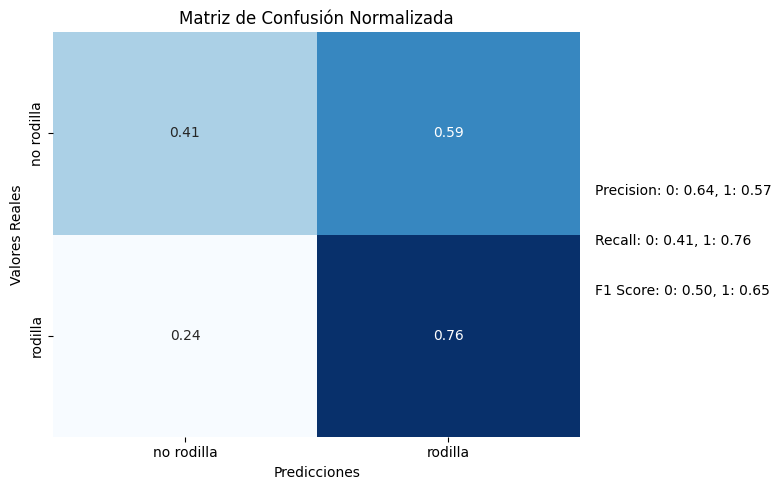


Classification Report:

              precision    recall  f1-score   support

  no rodilla       0.64      0.41      0.50        17
     rodilla       0.57      0.76      0.65        17

    accuracy                           0.59        34
   macro avg       0.60      0.59      0.57        34
weighted avg       0.60      0.59      0.58        34



In [19]:
evaluate_and_plot_model(gbc3, X_test_selected, y_test, class_names)

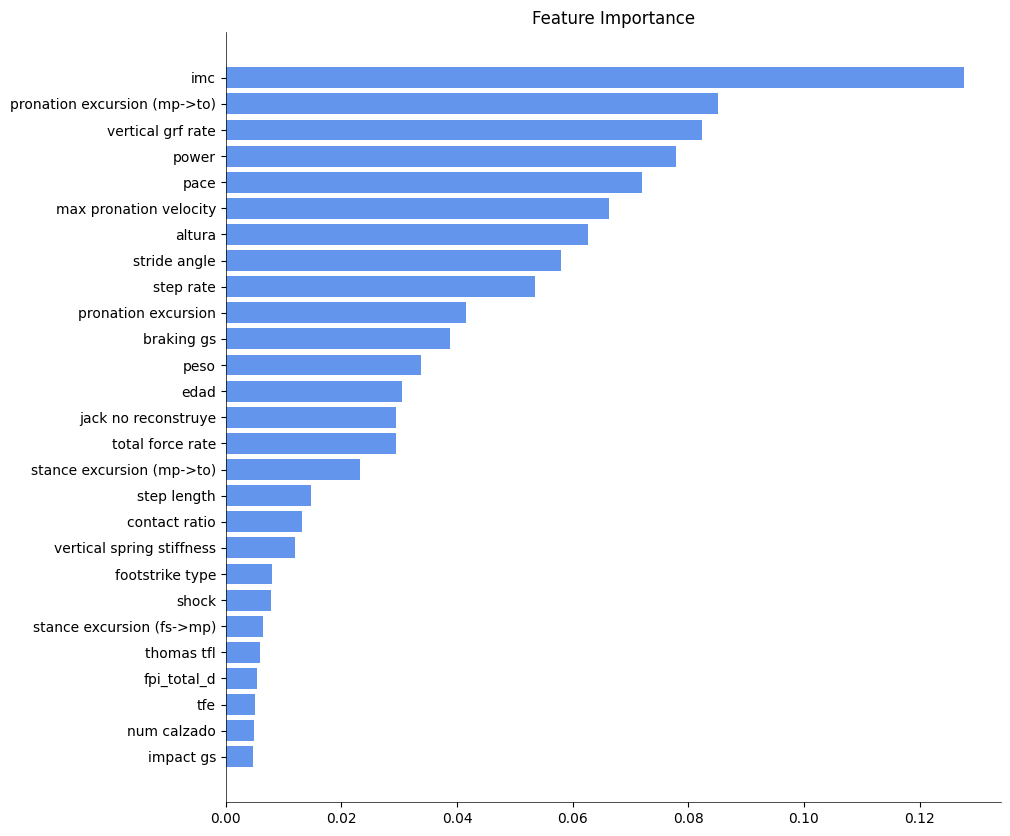

The top 20 most important features are:
['imc' 'pronation excursion (mp->to)' 'vertical grf rate' 'power' 'pace'
 'max pronation velocity' 'altura' 'stride angle' 'step rate'
 'pronation excursion' 'braking gs' 'peso' 'edad' 'jack no reconstruye'
 'total force rate' 'stance excursion (mp->to)' 'step length'
 'contact ratio' 'vertical spring stiffness' 'footstrike type']


In [20]:
top_features = plot_and_get_top_features(gbc3, X_train_selected, top_n=20)